In [ ]:
# Kapitel 1

In [ ]:
# Koduppgifter

In [ ]:
# 10. Gå igenom samtliga kodexempel i kapitlet och skriv gärna av koden manuellt. Det är även bra att experimentera genom att ändra vissa delar av koden och läsa dokumentationen.

In [1]:
# 1.2 Fyra problemkategoriseringar inom maskininlärning: regression, klassificering, dimensionreducering och klustring

In [2]:
import pandas as pd

regression_data = {
    "Inkomst (y)": [58500, 42000, 34000, 39000],
    "Ålder (x)": [58, 29, 35, 42]
}

df_reg = pd.DataFrame(regression_data)
df_reg

,Inkomst (y),Ålder (x)
0,58500,58
1,42000,29
2,34000,35
3,39000,42


In [3]:
import pandas as pd

classification_data = {
    "Kön (y)": ["Man", "Kvinna", "Man", "Kvinna"],
    "Inkomst (x1)": ["84000", "36750", "33000", "53000"],
    "Ålder (x2)": [58, 29, 35, 42]
}

df_classification = pd.DataFrame(classification_data)
df_classification

,Kön (y),Inkomst (x1),Ålder (x2)
0,Man,84000,58
1,Kvinna,36750,29
2,Man,33000,35
3,Kvinna,53000,42


In [4]:
# 1.3.1 Träningsdata, valideringsdata och testdata

In [5]:
import sklearn
print(sklearn.__version__)

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes(as_frame=True)

df = diabetes.frame
print(df.head())

X = df.drop(columns='target')
y = df['target']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

1.7.1
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

linreg = LinearRegression()
tree = DecisionTreeRegressor(random_state=42)

linreg.fit(X_train, y_train)
tree.fit(X_train, y_train)

rmse_linreg  = root_mean_squared_error(y_val, linreg.predict(X_val))
rmse_tree = root_mean_squared_error(y_val, tree.predict(X_val))

print(f"RMSE på validering - Linjär Regression: {rmse_linreg:.2f}")
print(f"RMSE på validering - Beslutsträd: {rmse_tree:.2f}")

if rmse_linreg < rmse_tree:
    best_model = LinearRegression()
    best_model_name = "Linjär Regression"

else:
    best_model = DecisionTreeRegressor(random_state=42)
    best_model_name = "Beslutsträd"

best_model.fit(X_train_full, y_train_full)

rmse_test = root_mean_squared_error(y_test, best_model.predict(X_test))

print(f"Bästa modell baserat på validering: {best_model_name}")
print(f"RMSE på testdatan: {rmse_test:.2f}")

best_model.fit(X,y)

RMSE på validering - Linjär Regression: 51.19
RMSE på validering - Beslutsträd: 65.81
Bästa modell baserat på validering: Linjär Regression
RMSE på testdatan: 53.85


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 1.3.2 K-delad korsvalidering

In [8]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_validate

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
svm = LinearSVR()

cv_lr = cross_validate(lr, X, y, cv=5, scoring = 'neg_root_mean_squared_error')
cv_svm = cross_validate(svm, X, y, cv=3, scoring = 'neg_root_mean_squared_error')

print(cv_lr.keys())

print(cv_lr['test_score'])
print(cv_svm['test_score'])

if np.mean(cv_lr['test_score']) > np.mean(cv_svm['test_score']):
    print("The best model is linear regression.")
elif np.mean(cv_lr['test_score']) == np.mean(cv_svm['test_score']):
    print("The models are equally good.")
else:
    print("The best model is support vector machine.")

dict_keys(['fit_time', 'score_time', 'test_score'])
[-52.72497937 -55.03486476 -56.90068179 -54.85204179 -53.94638716]
[-90.2051448  -93.1264155  -94.31100509]
The best model is linear regression.


In [9]:
# 1.3.3 RMSE

In [10]:
from sklearn.metrics import root_mean_squared_error
y_true = [4, 10, 8]
y_pred = [2, 13, 5]
root_mean_squared_error(y_true, y_pred)

2.70801280154532

In [11]:
# 1.3.4 Hyperparameter och parametrar

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data
example_data = {
    "y": [-10, 3, 2, 7, -9, 10, 9, 7, 4, 7, 3, 2, -4, -5, -9, -4],
    "x": [-3, 0, 1, 2, 4, 2, 3, 5, 7, 8, 9, 6, -2, -5, -1, -2]
}

example_data = pd.DataFrame(example_data)

lin_reg_1 = LinearRegression(fit_intercept=False)
lin_reg_1.fit(example_data[["x"]], example_data["y"])

lin_reg_2 = LinearRegression(fit_intercept=True)
lin_reg_2.fit(example_data[["x"]], example_data["y"])

print('Parameters for lin_reg_1.', 'Intercept:',
     round(lin_reg_1.intercept_, 2), 'Slope',
     round(lin_reg_1.coef_[0], 2))

print('Parameters for lin_reg_2.', 'Intercept:',
     round(lin_reg_2.intercept_, 2), 'Slope',
     round(lin_reg_2.coef_[0], 2))

Parameters for lin_reg_1. Intercept: 0.0 Slope 0.8
Parameters for lin_reg_2. Intercept: -1.13 Slope 0.91


In [13]:
# 1.3.5 Grid search

In [14]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Data
example_data = {
    "y": [-10, 3, 2, 7, -9, 10, 9, 7, 4, 7, 3, 2, -4, -5, -9, -4],
    "x": [-3, 0, 1, 2, 4, 2, 3, 5, 7, 8, 9, 6, -2, -5, -1, -2]
}

example_data = pd.DataFrame(example_data)

model = LinearRegression()

hyperparameters = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring='neg_mean_squared_error', cv=2)

grid_search.fit(example_data[["x"]], example_data["y"])

,estimator,LinearRegression()
,param_grid,"{'fit_intercept': [True, False]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,fit_intercept,False


In [15]:
df_gs_results = pd.DataFrame(grid_search.cv_results_)
df_gs_results.iloc[:, [0, 1, 5]]

,mean_fit_time,std_fit_time,params
0,0.002951,0.000785,{'fit_intercept': True}
1,0.002764,0.000890,{'fit_intercept': False}


In [16]:
df_gs_results.iloc[:, [5, 6, 7, 8]]

,params,split0_test_score,split1_test_score,mean_test_score
0,{'fit_intercept': True},-59.095576,-28.876354,-43.985965
1,{'fit_intercept': False},-47.703118,-28.890138,-38.296628


In [17]:
df_gs_results.iloc[:, [5, 8, 10]]

,params,mean_test_score,rank_test_score
0,{'fit_intercept': True},-43.985965,2
1,{'fit_intercept': False},-38.296628,1


In [18]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002951,0.000785,0.001393,0.000054,True,{'fit_intercept': True},-59.095576,-28.876354,-43.985965,15.109611,2
1,0.002764,0.000890,0.001526,0.000032,False,{'fit_intercept': False},-47.703118,-28.890138,-38.296628,9.406490,1


In [19]:
# 1.3.6 Kategorisk data

In [20]:
nominal_data = {'färg': ['röd', 'grön', 'blå', 'svart', 'röd', 'grön', 'grön', 'röd']}
nominal_df = pd.DataFrame(nominal_data)
nominal_df

,färg
0,röd
1,grön
2,blå
3,svart
4,röd
5,grön
6,grön
7,röd


In [21]:
oh_encoding = pd.get_dummies(nominal_df, dtype = int)
oh_encoding

,färg_blå,färg_grön,färg_röd,färg_svart
0,0,0,1,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0


In [22]:
dummy_encoding = pd.get_dummies(nominal_df, dtype = int, drop_first = True)
dummy_encoding

,färg_grön,färg_röd,färg_svart
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,1
4,0,1,0
5,1,0,0
6,1,0,0
7,0,1,0


In [23]:
ordinal_data = { 'Produkt': ['XXX', 'YYY', 'XXY', 'XYX', 'YXX'],
                'Pris': ['hög', 'medel', 'låg', 'hög', 'låg']
               }
ordinal_df = pd.DataFrame(ordinal_data)
ordinal_df

,Produkt,Pris
0,XXX,hög
1,YYY,medel
2,XXY,låg
3,XYX,hög
4,YXX,låg


In [24]:
mapping = {"låg": 1, "medel": 2, "hög": 3}
ordinal_df["Pris"] = ordinal_df["Pris"].map(mapping)
ordinal_df

,Produkt,Pris
0,XXX,3
1,YYY,2
2,XXY,1
3,XYX,3
4,YXX,1


In [25]:
ordinal_df_2 = pd.DataFrame(ordinal_data)

ordinal_df_2['PrisOrdinalKodad'] = ordinal_df_2['Pris'].map(mapping)
ordinal_df_2

,Produkt,Pris,PrisOrdinalKodad
0,XXX,hög,3
1,YYY,medel,2
2,XXY,låg,1
3,XYX,hög,3
4,YXX,låg,1


In [26]:
nominal_df

,färg
0,röd
1,grön
2,blå
3,svart
4,röd
5,grön
6,grön
7,röd


In [27]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(sparse_output=False).fit_transform(nominal_df[['färg']])

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [28]:
# 1.3.7 Feature Engineering

In [29]:
example_data = {'Pris (tkr)': [4200, 2500, 7900, 6100, 6500],
'kvm': [120, 80, 250, 200, 150],
'antal rum': [4, 3, 7, 5, 4],
'byggår': [2005, 2016, 1980, 1990, 2020]}
example_data = pd.DataFrame(example_data)
example_data

,Pris (tkr),kvm,antal rum,byggår
0,4200,120,4,2005
1,2500,80,3,2016
2,7900,250,7,1980
3,6100,200,5,1990
4,6500,150,4,2020


In [30]:
example_data['snitt_kvm_per_rum'] = example_data['kvm'] / example_data['antal rum']

example_data['ny_husmodell'] = (example_data['byggår'] > 2000).astype(int)
example_data

,Pris (tkr),kvm,antal rum,byggår,snitt_kvm_per_rum,ny_husmodell
0,4200,120,4,2005,30.000000,1
1,2500,80,3,2016,26.666667,1
2,7900,250,7,1980,35.714286,0
3,6100,200,5,1990,40.000000,0
4,6500,150,4,2020,37.500000,1


In [31]:
from sklearn.preprocessing import StandardScaler
import numpy as np

example_data = np.array([[1.0, 2.0], [3.0, 6.0], [5.0, 10.0]])

scaler = StandardScaler()
example_data_scaled = scaler.fit_transform(example_data)

print("Original data:\n", example_data)
print("Scaled data:\n", example_data_scaled)
print("Medelvärde efter skalning:", np.mean(example_data_scaled, axis=0))
print("Standardavikelse efter skalning:", np.std(example_data_scaled, axis=0))

Original data:
 [[ 1.  2.]
 [ 3.  6.]
 [ 5. 10.]]
Scaled data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
Medelvärde efter skalning: [0. 0.]
Standardavikelse efter skalning: [1. 1.]


In [ ]:
# 11. I Koden nedan använder vi först test_size=0.2 och sedan test_size=0.25, förklara varför det ger oss propositionerna 60-20-20

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [40]:
# I den första uppdelningen ger det oss: 
# Train_full = 80% och Test = 20%.
#
# I den andra uppdelningen ger det oss:
# Validation = 25% av 80% = 0.25*0.80 = 0.20 = 20% av hela datan.
# Train = 75% av 80% = 0.75*0.80 = 0.60 = 60% av hela datan.
# Det ger oss då Train: 60, Validation: 20 och Test: 20, 60-20-20.

In [ ]:
# Kapitel 2

In [42]:
# Koduppgifter

In [43]:
# 7. Gå igenom samtliga kodexempel i kapitlet och skriv gärna av koden manuellt. Det är även bra att experimentera genom att ändra vissa delar av koden och läsa dokumentationen.

In [44]:
# 2.1.7 Produktionssättning av modellen och övervakning av implementering

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import joblib

x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

joblib.dump(model, 'our_linear_model.pkl')
print("Model saved!")

loaded_model = joblib.load('our_linear_model.pkl')
print("Model loaded!")

prediction = loaded_model.predict([x_test[5]])
print(f"Predicted value: {prediction}")

Model saved!
Model loaded!
Predicted value: [-12.80652919]


In [46]:
# 2.2 Kodexempel från början till slut - Huspriser i Kalifornien

In [47]:
# [2] Få tillgång till datan.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
# Vi laddar nu in datan och inspekterar den

In [58]:
housing_original = pd.read_csv("/home/danluc/anaconda3/paivt25d_arin/ai_tillaempad_ml/övningsuppgifter/dataset/housing.csv")

In [59]:
# Genom att använda .info() metoden får vi koncis summering av datan.

In [60]:
housing_original.iloc[:, :6].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population
0,-122.23,37.88,41.0,880.0,129.0,322.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0


In [61]:
housing_original.iloc[:, :5].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0
1,-122.22,37.86,21.0,7099.0,1106.0
2,-122.24,37.85,52.0,1467.0,190.0
3,-122.25,37.85,52.0,1274.0,235.0
4,-122.25,37.85,52.0,1627.0,280.0


In [62]:
housing_original['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [63]:
housing = housing_original[housing_original['ocean_proximity'] != 'ISLAND']
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [64]:
housing = pd.get_dummies(housing, columns = ['ocean_proximity'], dtype = int, prefix = 'dmy')

In [65]:
housing.iloc[[1, 200, 1000, 1850, 5000], 9:]

,dmy_<1H OCEAN,dmy_INLAND,dmy_NEAR BAY,dmy_NEAR OCEAN
1,0,0,1,0
200,0,0,1,0
1000,0,1,0,0
1850,0,0,0,1
5000,1,0,0,0


In [66]:
train_full, test = train_test_split(housing, test_size=0.2, random_state=40)
train, val = train_test_split(train_full, test_size=0.25, random_state=36)

In [67]:
# [3-4] EDA och databearbetning

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12381 entries, 12054 to 14298
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12381 non-null  float64
 1   latitude            12381 non-null  float64
 2   housing_median_age  12381 non-null  float64
 3   total_rooms         12381 non-null  float64
 4   total_bedrooms      12261 non-null  float64
 5   population          12381 non-null  float64
 6   households          12381 non-null  float64
 7   median_income       12381 non-null  float64
 8   median_house_value  12381 non-null  float64
 9   dmy_<1H OCEAN       12381 non-null  int64  
 10  dmy_INLAND          12381 non-null  int64  
 11  dmy_NEAR BAY        12381 non-null  int64  
 12  dmy_NEAR OCEAN      12381 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.3 MB


In [69]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12261 entries, 12054 to 14298
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12261 non-null  float64
 1   latitude            12261 non-null  float64
 2   housing_median_age  12261 non-null  float64
 3   total_rooms         12261 non-null  float64
 4   total_bedrooms      12261 non-null  float64
 5   population          12261 non-null  float64
 6   households          12261 non-null  float64
 7   median_income       12261 non-null  float64
 8   median_house_value  12261 non-null  float64
 9   dmy_<1H OCEAN       12261 non-null  int64  
 10  dmy_INLAND          12261 non-null  int64  
 11  dmy_NEAR BAY        12261 non-null  int64  
 12  dmy_NEAR OCEAN      12261 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.3 MB


In [70]:
val = val.dropna()
test = test.dropna()

In [75]:
from sklearn.impute import SimpleImputer

imputer_demo_df = pd.DataFrame({
    'A': [7, 4, 10],
    'B': [2, np.nan, 5],
    'C': [3, 6, 9]
})

print(imputer_demo_df)

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(imputer_demo_df)

print(df_imputed)

print("Before imputation, type:", type(imputer_demo_df))
print("After imputation, type:", type(df_imputed))

    A    B  C
0   7  2.0  3
1   4  NaN  6
2  10  5.0  9
[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   5.   9. ]]
Before imputation, type: <class 'pandas.core.frame.DataFrame'>
After imputation, type: <class 'numpy.ndarray'>


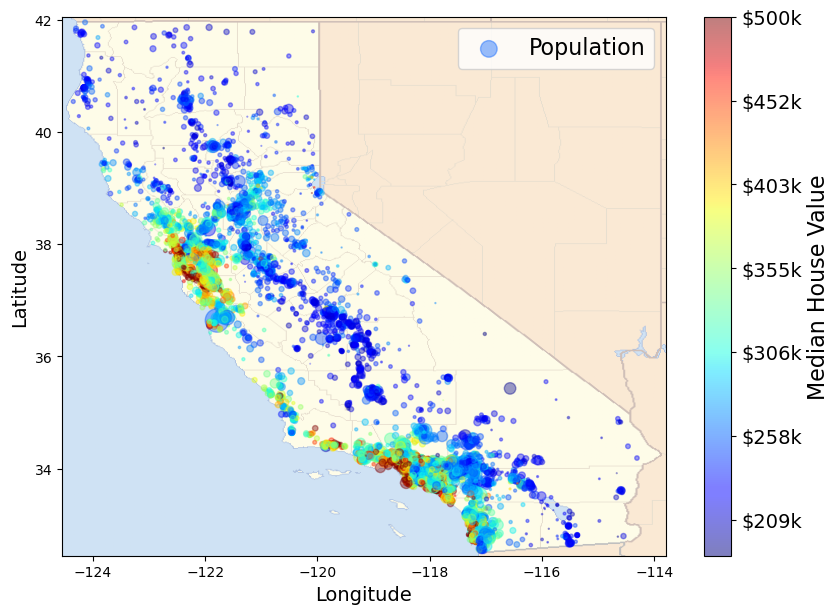

In [78]:
import matplotlib.image as mpimg
california_img=mpimg.imread('/home/danluc/anaconda3/paivt25d_arin/ai_tillaempad_ml/material/california.png')

ax = train.plot(kind="scatter", x="longitude", y="latitude",
                figsize=(10, 7),
                s=train['population']/100, label="Population",
                c="median_house_value",
                cmap=plt.get_cmap("jet"),
                colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

In [79]:
corr_matrix = train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689648
dmy_<1H OCEAN         0.253893
dmy_NEAR BAY          0.159601
dmy_NEAR OCEAN        0.148101
total_rooms           0.132945
housing_median_age    0.099810
households            0.063797
total_bedrooms        0.048099
population           -0.025675
longitude            -0.043444
latitude             -0.147407
dmy_INLAND           -0.485680
Name: median_house_value, dtype: float64

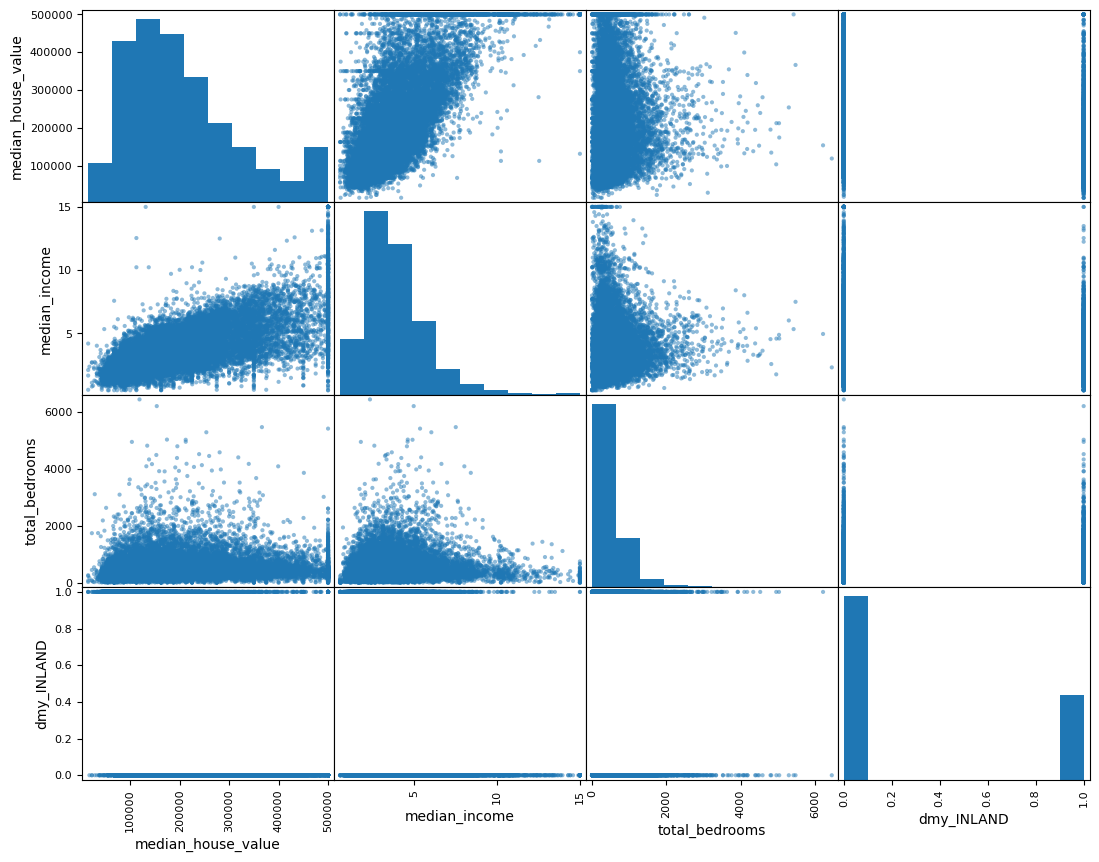

In [80]:
attributes = ["median_house_value", "median_income", "total_bedrooms", "dmy_INLAND"]

pd.plotting.scatter_matrix(housing[attributes], figsize=(13, 10))
plt.show()

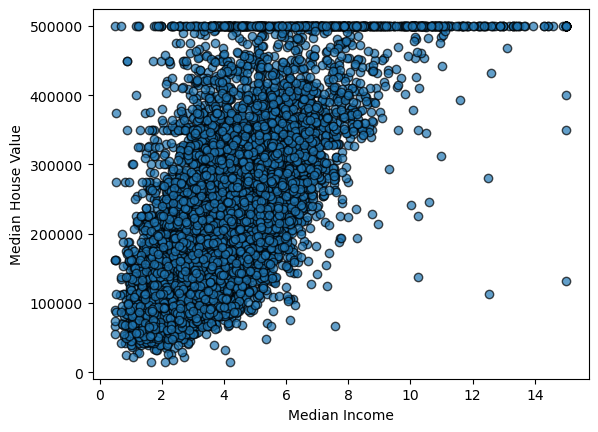

In [81]:
plt.scatter(train['median_income'], train['median_house_value'], alpha=0.7, edgecolor='k')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

<Axes: xlabel='dmy_NEAR OCEAN', ylabel='median_house_value'>

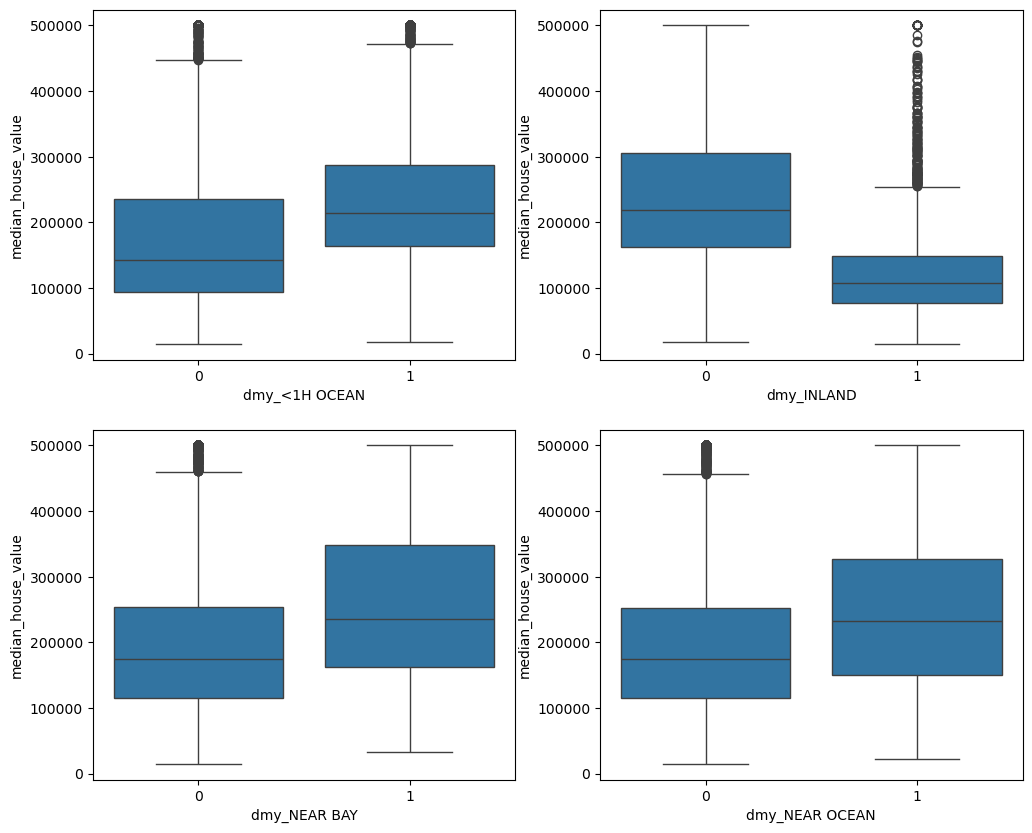

In [82]:
fig,axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=train, x='dmy_<1H OCEAN', y='median_house_value', ax=axes[0, 0])
sns.boxplot(data=train, x='dmy_INLAND', y='median_house_value', ax=axes[0, 1])
sns.boxplot(data=train, x='dmy_NEAR BAY', y='median_house_value', ax=axes[1, 0])
sns.boxplot(data=train, x='dmy_NEAR OCEAN', y='median_house_value', ax=axes[1, 1])

In [83]:
# [5] ML-modellering

In [84]:
X_train_full = train_full.drop(columns=['median_house_value'])
y_train_full = train_full['median_house_value']

X_train, y_train = train.drop(columns=['median_house_value']), train['median_house_value'] 
X_val, y_val = val.drop(columns=['median_house_value']), val['median_house_value']
X_test, y_test = test.drop(columns=['median_house_value']), test['median_house_value']

In [85]:
print(X_train.shape)
print(y_train.shape)

(12261, 12)
(12261,)


In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
import time
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()

rf = RandomForestRegressor()
hyperparam_grid = {'max_depth': [5, 10, 15, 50], 'n_estimators': [1, 5, 10]}
grid_search = GridSearchCV(rf, hyperparam_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

end_time = time.time()

execution_time = end_time - start_time
print(f"GridSearchCV fitting took {execution_time:.4f} seconds.")

GridSearchCV fitting took 23.5625 seconds.


In [88]:
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
pd.DataFrame(grid_search.cv_results_)

Best Hyperparameters from GridSearchCV: {'max_depth': 50, 'n_estimators': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059821,0.017669,0.002356,0.000298,5,1,"{'max_depth': 5, 'n_estimators': 1}",-67395.642699,-72489.719016,-71204.580979,-70789.840320,-71707.400245,-70717.436652,1754.872055,10
1,0.153056,0.027535,0.002998,0.000269,5,5,"{'max_depth': 5, 'n_estimators': 5}",-65780.497433,-68666.724029,-67107.428603,-68102.317340,-68568.606923,-67645.114866,1083.647697,9
2,0.366829,0.078614,0.004671,0.002067,5,10,"{'max_depth': 5, 'n_estimators': 10}",-64931.698173,-68553.786919,-67292.179907,-68554.166417,-68272.391145,-67520.844512,1375.173646,8
3,0.054648,0.002702,0.002376,0.000281,10,1,"{'max_depth': 10, 'n_estimators': 1}",-62470.301292,-69818.293110,-66344.933381,-64585.322028,-68946.827485,-66433.135459,2716.769723,7
4,0.382371,0.041422,0.005497,0.004115,10,5,"{'max_depth': 10, 'n_estimators': 5}",-55027.188916,-58530.460215,-58833.867361,-56577.287149,-57819.985187,-57357.757766,1400.604891,6
5,0.711155,0.158873,0.005452,0.001566,10,10,"{'max_depth': 10, 'n_estimators': 10}",-53324.269197,-55895.177174,-55937.618502,-54521.856600,-55185.993555,-54972.983006,974.485452,3
6,0.143459,0.070188,0.003433,0.001102,15,1,"{'max_depth': 15, 'n_estimators': 1}",-70693.019692,-71571.408362,-73839.810195,-72689.502341,-70583.276716,-71875.403461,1239.490761,11
7,0.552422,0.199054,0.007041,0.004140,15,5,"{'max_depth': 15, 'n_estimators': 5}",-53735.021826,-57332.725886,-56919.181279,-55977.725232,-56526.687031,-56098.268251,1263.391530,5
8,0.691606,0.004354,0.006227,0.000387,15,10,"{'max_depth': 15, 'n_estimators': 10}",-51885.624293,-53245.587824,-54646.077159,-53212.938384,-54012.448517,-53400.535235,925.199329,2
9,0.084087,0.001946,0.002362,0.000023,50,1,"{'max_depth': 50, 'n_estimators': 1}",-71677.546610,-77904.531599,-74918.663302,-74876.292337,-73426.497777,-74560.706325,2049.777264,12


In [89]:
lr_pred_val = lin_reg.predict(X_val)
rf_pred_val = grid_search.predict(X_val)

print('RMSE Linear Regression:', root_mean_squared_error(y_val, lr_pred_val))
print('RMSE Random Forrest Regression:', root_mean_squared_error(y_val, rf_pred_val))

RMSE Linear Regression: 69442.09533293545
RMSE Random Forrest Regression: 52817.400048782685


In [90]:
print(np.mean(y_val))
print(root_mean_squared_error(y_val, rf_pred_val)/np.mean(y_val))

207517.1138589618
0.2545206950241214


Text(0.5, 1.0, 'Boxplot of Prediction Errors (y_val - rf_pred_val)')

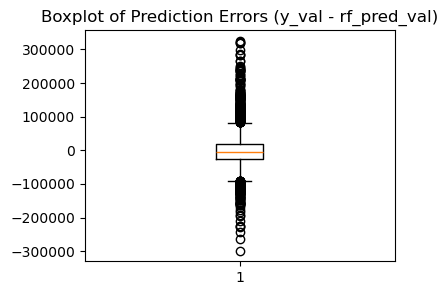

In [91]:
errors = y_val - rf_pred_val

plt.figure(figsize=(4, 3))
plt.boxplot(errors)
plt.title('Boxplot of Prediction Errors (y_val - rf_pred_val)')

In [92]:
best_params = grid_search.best_params_
best_params

{'max_depth': 50, 'n_estimators': 10}

In [93]:
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_full, y_train_full)

,n_estimators,10
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
rf_pred_test = best_rf.predict(X_test)
rmse_test = root_mean_squared_error(y_test, rf_pred_test)

print('RMSE Random Forrest on Test data:', rmse_test)
print(rmse_test/np.mean(y_test))

RMSE Random Forrest on Test data: 50544.39220795694
0.24446566488952814


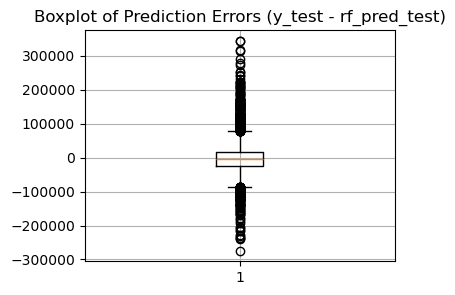

In [96]:
errors = y_test - rf_pred_test

plt.figure(figsize=(4, 3))
plt.boxplot(errors)
plt.title('Boxplot of Prediction Errors (y_test - rf_pred_test)')
plt.grid(True)

In [97]:
X_full = housing.drop(columns=['median_house_value'])
y_full = housing['median_house_value']

saved_model = RandomForestRegressor(**best_params)
saved_model.fit(X_full, y_full)

joblib.dump(saved_model, 'rf_saved_model.pkl')

['rf_saved_model.pkl']

In [98]:
new_districts = pd.DataFrame({
    'longitude': [-118.30, -117.85],
    'latitude': [34.20, 33.90],
    'housing_median_age': [35.0, 20.0],
    'total_rooms': [880.0, 1200.0],
    'total_bedrooms': [200.0, 300.0],
    'population': [500.0, 750.0],
    'households': [220.0, 280.0],
    'median_income': [4.2, 5.1],
    'dmy_<1H OCEAN': [0, 1],
    'dmy_INLAND': [1, 0],
    'dmy_NEAR BAY': [0, 0],
    'dmy_NEAR OCEAN': [0, 0]
})

predicted_values = saved_model.predict(new_districts)

for i, value in enumerate(predicted_values, start=1):
    print (f"Predicted median house value for district {i}:${value:,.2f}")

Predicted median house value for district 1:$219,309.90
Predicted median house value for district 2:$193,870.00


In [ ]:
# 8. Förklara vad koden nedan gör. Varför är det viktigt att kunna spara en modell? 

In [99]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from joblib import dump, load

X, y = make_regression(n_samples=20000, n_features=3, noise=0.1)

model = LinearRegression().fit(X, y)
dump(model, "linear_model.joblib")
model_loaded = load("linear_model.joblib")

print(model_loaded.predict(X[:5]))

[143.7947177   76.21515833  37.7050107  -49.22960894  -9.85641559]


In [ ]:
# Koden skapar ett dataset och tränar en linjär regressionsmodell. Sedan sparas modellen till en fil linear_model.joblib. Denna filen kan sedan laddas igen utan att träna modellen.
# Laddar in modellen som sparades och använder den för att göra prediktioner.
# Det är viktigt att kunna spara för att bygga skalbara, reproducerbara och användbara AI/ML-system.

In [ ]:
# 9. Denna uppgift består av flera steg enligt nedan.

In [100]:
# a) Läs in datasetet "data_01.csv" med funktionen `read_csv()` från Pandas. Funktionen returnerar en `DataFrame`.

In [102]:
import pandas as pd

df = pd.read_csv("/home/danluc/anaconda3/paivt25d_arin/ai_tillaempad_ml/övningsuppgifter/dataset/data_01.csv")

In [103]:
# b) Dela upp datasetet i `X` och `y`.

In [104]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [105]:
# c) Dela upp datan ytterligare, i ett träning-, ett validering-, och ett testset med `train_test_split()`.
# Låt 20% av datan vara testdata och 15% av den återstående datan vara valideringsdata.

In [106]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1875, random_state=42)

In [107]:
# d) Träna två valfria regressionsmodeller (exempelvis `LinearRegression` och `DecisionTreeRegressor`) på träningsdatan.
# Notera, i kapitel 3 kommer vi lära oss mer om `DecisionTreeRegressor`.

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linjär regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Beslutsträd
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
# e) Utvärdera modellerna på valideringsdatan.

In [109]:
from sklearn.metrics import mean_squared_error

# Linjär regression
y_val_pred_lin = linreg.predict(X_val)
mse_lin = mean_squared_error(y_val, y_val_pred_lin)

# Beslutsträd
y_val_pred_tree = tree.predict(X_val)
mse_tree = mean_squared_error(y_val, y_val_pred_tree)

print(f"Validerings-MSE (Linjär): {mse_lin:.2f}")
print(f"Validerings-MSE (Träd): {mse_tree:.2f}")

Validerings-MSE (Linjär): 11.05
Validerings-MSE (Träd): 9219.03


In [110]:
# f) Träna om den bäst presterande modellen på både tränings- och valideringsdatan.

In [111]:
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

best_model = DecisionTreeRegressor(random_state=42)
best_model.fit(X_combined, y_combined)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [112]:
# g) Utvärdera modellen på testdatan.

In [113]:
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Test-MSE: {mse_test:.2f}")

Test-MSE: 10015.62


In [114]:
# h) Träna om modellen på hela datasetet.

In [115]:
final_model = DecisionTreeRegressor(random_state=42)  # eller LinearRegression()
final_model.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [127]:
# 10. Datasetet "salary_dataset.csv" 

In [128]:
# a) Läs in datasetet "salary_dataset.csv" med pandas `read_csv()`-funktion och dela upp i `X` och `y`.
# Avgör själv vilken variabel som ska vara den beroende variabeln `y`.

In [129]:
import pandas as pd
df = pd.read_csv("/home/danluc/anaconda3/paivt25d_arin/ai_tillaempad_ml/övningsuppgifter/dataset/salary_dataset.csv")

In [130]:
# b) Dela upp datasetet i träning- och testset. (Inget validerings-set alltså!)

In [131]:
X = df[["YearsExperience"]]
y = df["Salary"]

In [132]:
# c) Träna två regressionsmodeller med k-delad korsvalidering med `cross_validate()`-funktionen från *scikit-learn*. 
# Använd `neg_root_mean_squared_error` som `scoring`. Välj själv hur många iterationer den ska göra genom hyperparametern `cv`.

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# d) Utvärdera modellen som presterar bäst på testsetet.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import numpy as np

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=42)

cv = 5

cv_results_1 = cross_validate(model1, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error", return_train_score=True)
cv_results_2 = cross_validate(model2, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error", return_train_score=True)

print("Linear Regression - CV RMSE (Test):", -np.mean(cv_results_1['test_score']))
print("Random Forest - CV RMSE (Test):", -np.mean(cv_results_2['test_score']))

Linear Regression - CV RMSE (Test): 5293.2031969987775
Random Forest - CV RMSE (Test): 4921.142169942318


In [136]:
# Jag har inte utfört uppgift 11 och 12.

In [137]:
# Kapitel 3

In [138]:
# Koduppgifter

In [139]:
# 11. Gå igenom samtliga kodexempel i kapitlet och skriv gärna av koden manuellt. 
# Det är även bra att experimentera genom att ändra vissa delar av koden och läsa dokumentationen. 

In [140]:
# 3.2.2 Mean squared error (MSE)

In [141]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_squared_error(y_true, y_pred)

0.375

In [142]:
# 3.2.3 Mean absolute error (MAE)

In [143]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_absolute_error(y_true, y_pred)

0.5

In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

y_true = [100, 80]
y_pred_model_1 = [90, 75]
y_pred_model_2 = [90, 15]

MAE1 = mean_absolute_error(y_true, y_pred_model_1)
MAE2 = mean_absolute_error(y_true, y_pred_model_2)

RMSE1 = root_mean_squared_error(y_true, y_pred_model_1)
RMSE2 = root_mean_squared_error(y_true, y_pred_model_2)

print("MAE1 =", MAE1)
print("MAE2 =", MAE2)

print("RMSE1 =", RMSE1)
print("RMSE2 =", RMSE2)

MAE1 = 7.5
MAE2 = 37.5
RMSE1 = 7.905694150420948
RMSE2 = 46.502688094345686


In [145]:
# 3.3 Regressionsmodeller

In [146]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=5000, n_features=3, noise=5, random_state=42)

print(X[:4, :])
print(y[:4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 0.67796997 -1.28472777 -0.33102433]
 [ 1.03138053  0.3881858  -0.97027133]
 [-1.21689671  1.36337651 -0.60515624]
 [-0.54429615 -0.50442268 -1.5198928 ]]
[  -1.88062329  -46.40116933  -95.83251096 -155.05295711]


In [147]:
# 3.3.1 Linjär Regression

Intercept: 22.179402677651904
Slope: [0.46632338]
Predicting a new observation with model [23.11204943]
Predicting a new observation manually [[23.11204943]]


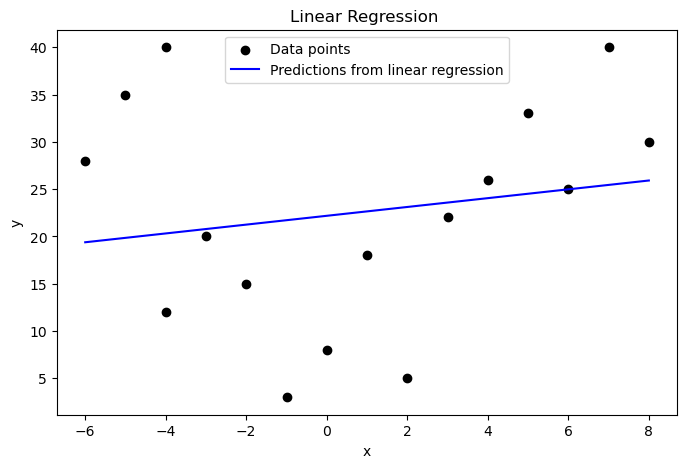

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
x = np.array([6, 7, 8, -4, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array ([25, 40, 30, 40, 28, 35, 12, 20, 15, 3, 8, 18, 5, 22, 26, 33])

# Fit model
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Print parameters
print ("Intercept:", lin_reg.intercept_)
print ("Slope:", lin_reg.coef_)

# Predicting a new observation
x_new = np.array(2).reshape(-1,1)
print("Predicting a new observation with model", lin_reg.predict(x_new))
print("Predicting a new observation manually", lin_reg.intercept_ + lin_reg.coef_*x_new)

# Create a plot
x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = lin_reg.predict(x_values)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, color='black', label='Data points')
ax.plot(x_values, y_pred, color='blue', label='Predictions from linear regression')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear Regression ")
ax.legend()

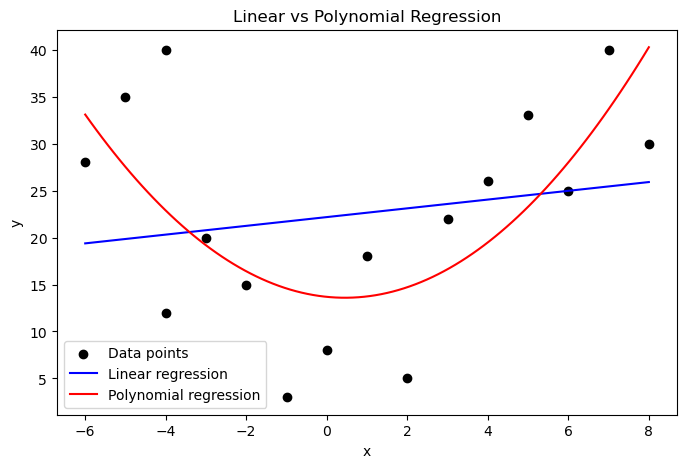

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
x = np.array([6, 7, 8, -4, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array ([25, 40, 30, 40, 28, 35, 12, 20, 15, 3, 8, 18, 5, 22, 26, 33])

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

# Create a plot
x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred_linear = lin_reg.predict(x_values)
x_values_poly = poly.transform(x_values)
y_pred_poly = poly_reg.predict(x_values_poly)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, color='black', label='Data points')
ax.plot(x_values, y_pred_linear, color='blue', label='Linear regression')
ax.plot(x_values, y_pred_poly, color='red', label='Polynomial regression')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear vs Polynomial Regression")
ax.legend()

In [150]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=5000, n_features=3, noise=5, random_state=42)

print(X[:4, :])
print(y[:4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()

poly_reg_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                              ('polyreg', LinearRegression())
                             ])

lin_reg.fit(X_train, y_train)
poly_reg_pipeline.fit(X_train, y_train)

y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_poly_reg = poly_reg_pipeline.predict(X_test)

RMSE_lin_reg = root_mean_squared_error(y_test, y_pred_lin_reg)
RMSE_poly_reg = root_mean_squared_error(y_test, y_pred_poly_reg)

print("RMSE for Linear Regression:", RMSE_lin_reg)
print("RMSE for Polynomial Regression:", RMSE_poly_reg)

if RMSE_lin_reg < RMSE_poly_reg:
    print("The linear regression model has lower RMSE and is hence better.")
elif RMSE_line_reg == RMSE_poly_reg:
    print("Both models have the same RMSE meaning they ae equally good.")
else:
    print("The polynomial regression model has lower RMSE and is hence better.")

[[ 0.67796997 -1.28472777 -0.33102433]
 [ 1.03138053  0.3881858  -0.97027133]
 [-1.21689671  1.36337651 -0.60515624]
 [-0.54429615 -0.50442268 -1.5198928 ]]
[  -1.88062329  -46.40116933  -95.83251096 -155.05295711]
RMSE for Linear Regression: 5.09730997273096
RMSE for Polynomial Regression: 5.101743953679335
The linear regression model has lower RMSE and is hence better.


In [151]:
# 3.3.4 Ridge regression (L2-regularisering)

In [152]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=5000, n_features=3, noise=5, random_state=42)

print(X[:4, :])
print(y[:4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()

hyperparams = {'alpha': [0.1,1,10]}
ridge = Ridge()
ridge_gs = GridSearchCV(estimator=ridge, param_grid=hyperparams, scoring='neg_mean_squared_error', cv=5)
ridge_gs.fit(X_train, y_train)

print("Optimized value for alpha:", ridge_gs.best_estimator_)
print("Coefficients for ridge regression:", np.round(ridge_gs.best_estimator_.coef_,5))

[[ 0.67796997 -1.28472777 -0.33102433]
 [ 1.03138053  0.3881858  -0.97027133]
 [-1.21689671  1.36337651 -0.60515624]
 [-0.54429615 -0.50442268 -1.5198928 ]]
[  -1.88062329  -46.40116933  -95.83251096 -155.05295711]
Optimized value for alpha: Ridge(alpha=0.1)
Coefficients for ridge regression: [38.99838  1.29336 89.84231]


In [153]:
# 3.3.5 Lasso regression (L1-regularisering)

In [154]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=9)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

RMSE_lasso = root_mean_squared_error(y_test, y_pred_lasso)

print("Coefficients for lasso regression:", np.round((lasso_reg.coef_), 2))
print("RMSE for lasso regression:", np.round(RMSE_lasso))


Coefficients for lasso regression: [29.78  0.   80.6 ]
RMSE for lasso regression: 13.0


In [155]:
# 3.3.6 Elastic net (Kombination av Lasso & Ridge)

In [156]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

hyperparams = {'alpha': [0.01, 0.1, 1.0, 10.0],
               'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}

elastic_net_gs = GridSearchCV(estimator=elastic_net, param_grid=hyperparams, scoring='neg_mean_squared_error', cv=5)

elastic_net_gs.fit(X_train, y_train)

print("Optimized value from grid search:", elastic_net_gs.best_estimator_)
print("Coefficients for elastic net:", np.round(elastic_net_gs.best_estimator_.coef_, 5))

y_pred = elastic_net_gs.predict(X_test)
rmse_elastic_net = root_mean_squared_error(y_test, y_pred)

print("RMSE for Elatic Net:", np.round(rmse_elastic_net, 4))

Optimized value from grid search: ElasticNet(alpha=0.01, l1_ratio=1.0)
Coefficients for elastic net: [38.98905  1.28335 89.83427]
RMSE for Elatic Net: 5.097


In [157]:
# 3.3.7 Support vector machines (SVM)

In [158]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svr_pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('svr', LinearSVR())
])

hyperparams = {'svr__epsilon': [0.01, 0.1, 1.0]}

svr_grid_search = GridSearchCV(estimator=svr_pipeline, param_grid=hyperparams, scoring='neg_mean_squared_error')

svr_grid_search.fit(X_train, y_train)

y_pred = svr_grid_search.predict(X_test)
rmse_svr = root_mean_squared_error(y_test, y_pred)

print("Optimized SVR pipeline:", svr_grid_search.best_estimator_)
print("RMSE for Elatic Net:", rmse_svr)

Optimized SVR pipeline: Pipeline(steps=[('scalar', StandardScaler()), ('svr', LinearSVR(epsilon=0.1))])
RMSE for Elatic Net: 5.088569426939426


In [159]:
# 3.3.8 Beslutsträd

In [160]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42)

hyperparams = {'max_depth': [2, 3, 5, 10],
               'min_samples_split': [2, 5, 10]}

dec_tree_gs = GridSearchCV(estimator=dec_tree, param_grid=hyperparams, scoring='neg_mean_squared_error')

dec_tree_gs.fit(X_train, y_train)

y_pred = dec_tree_gs.predict(X_test)
rmse_tree = root_mean_squared_error(y_test, y_pred)

print("Optimized hyperparameters with grid search:", dec_tree_gs.best_params_)
print("RMSE on test set:", rmse_tree)

Optimized hyperparameters with grid search: {'max_depth': 10, 'min_samples_split': 2}
RMSE on test set: 9.030516304736176


In [161]:
# 3.3.9 Ensemble learning

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor

### Voting regression done manually
# Initialize regressor
m1 = LinearRegression()
m2 = DecisionTreeRegressor(max_depth=3, random_state=2)
m3 = LinearSVR(random_state=2)

# Fit each model individually
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

# Predict with each model individually
pred1 = m1.predict(X_test)
pred2 = m2.predict(X_test)
pred3 = m3.predict(X_test)

# The esemble prediction is obtained by averaging the individual predictions
avg_pred = (pred1 + pred2 + pred3) / 3
print(avg_pred[0:5])

### Using VotingRegressor
voting_regressor = VotingRegressor([('lin_reg', m1), ('dec_tree', m2), ('svm', m3)])
voting_regressor.fit(X_train, y_train)
voting_regressor_pred = voting_regressor.predict(X_test)
print(voting_regressor_pred[0:5])

[ -41.03912946  -18.99966521   68.61782186 -127.66927334  -24.1281992 ]
[ -41.03912946  -18.99966521   68.61782186 -127.66927334  -24.1281992 ]


In [1]:
# Jag har inte utfört uppgift 12 till 15.

In [2]:
# Kapitel 4

In [3]:
# 4.2.1 Confusion matrix

In [4]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2 ,2, 1, 0, 1, 2, 0]
y_pred = [0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1]

cm = confusion_matrix (y_true, y_pred)
print(cm)

[[3 2 1]
 [1 4 1]
 [1 2 3]]


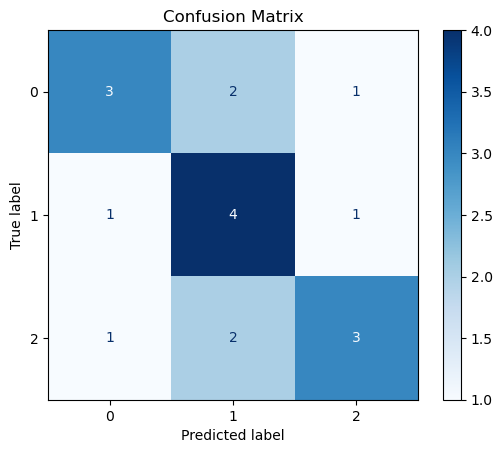

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1", "2"])
disp.plot(cmap = "Blues", values_format="d")                              
plt.title("Confusion Matrix")
plt.show()

In [10]:
# 4.2.2 Accuracy

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.56


In [12]:
# 4.2.3 Precision and Recall

In [13]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average = "macro")
recall = recall_score(y_true, y_pred, average = "macro")
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
                 

Precision: 0.567
Recall: 0.556


In [14]:
# 4.2.4 F1-score

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred, average="macro")
print("F1-score:", round (f1, 2))

F1-score: 0.55


In [16]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [17]:
# 4.2.5 ROC-kurvan

In [18]:
from sklearn.metrics import roc_auc_score

y_true = [0, 1, 0, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

auc_score = roc_auc_score(y_true, y_scores)
print("ROC-AUX:", round(auc_score, 2))

ROC-AUX: 1.0


In [19]:
# 4.3 Klassificeringsmodeller

[Text(0.5, 1.0, 'Make Moons'), Text(0.5, 0, 'x1'), Text(0, 0.5, 'x2')]

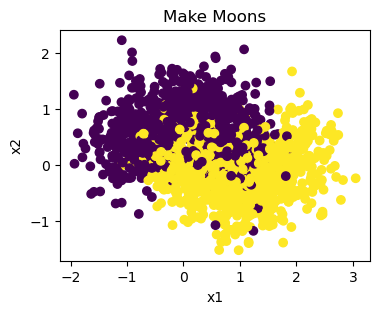

In [20]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=2000, noise=0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax.set(title="Make Moons", xlabel="x1", ylabel="x2")

In [21]:
# 4.3.1 Logistisk regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.83


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model_poly = make_pipeline(
    PolynomialFeatures(degree=3), LogisticRegression()
)

model_poly.fit(X_train, y_train)

y_pred = model_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:-2f}")

Test Accuracy: 0.860000


In [24]:
# 4.3.2 Support vector machines (SVM)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

model_linear_svc = make_pipeline(
    StandardScaler(),
    LinearSVC()
)

hyperparam_grid = {
    'linearsvc__C': [0.01, 0.1, 1]
}

model_linear_svc_grid_search = GridSearchCV(model_linear_svc, hyperparam_grid, cv=5, scoring='accuracy')

model_linear_svc_grid_search.fit(X_train, y_train)

y_pred = model_linear_svc_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:-2f}")
print("Best hyperparameters:", model_linear_svc_grid_search.best_params_)

Test Accuracy: 0.832500
Best hyperparameters: {'linearsvc__C': 0.1}


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model_svc = make_pipeline(
    StandardScaler(),
    SVC()
)

hyperparam_grid = {
    'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1]    
}

model_svc_grid_search = GridSearchCV(model_svc, hyperparam_grid, cv=5, scoring='accuracy')

model_svc_grid_search.fit(X_train, y_train)

y_pred = model_svc_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:-2f}")
print("Best hyperparameters:", model_svc_grid_search.best_params_)

Test Accuracy: 0.860000
Best hyperparameters: {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}


In [27]:
# 4.3.3 Beslutsträd

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:-2f}")

y_proba = tree_clf.predict_proba(X_test)
print("Predicted probabilities (first 5 rows): \n", np.round(y_proba[:5], 3))

Test Accuracy: 0.855000
Predicted probabilities (first 5 rows): 
 [[0.163 0.837]
 [0.163 0.837]
 [0.884 0.116]
 [0.163 0.837]
 [0.163 0.837]]


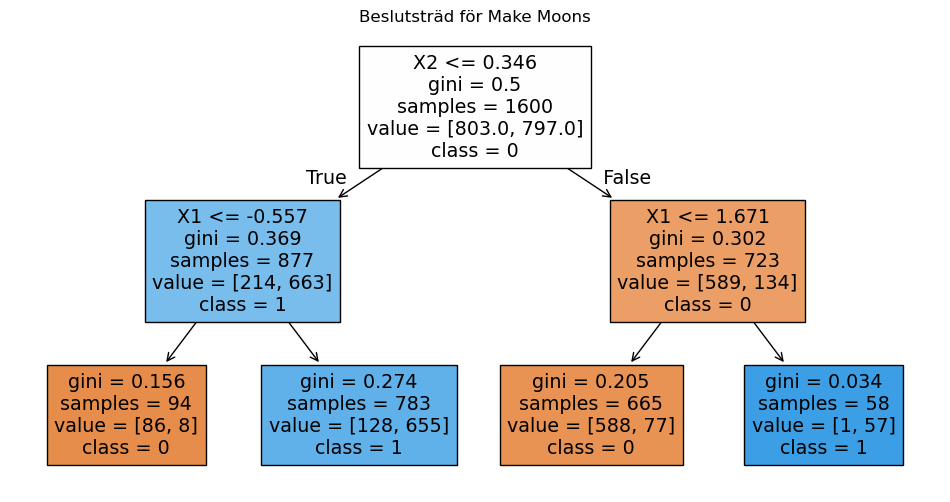

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(tree_clf, filled=True, feature_names=["X1", "X2"],
          class_names=["0", "1"])
plt.title("Beslutsträd för Make Moons")
plt.show()

In [34]:
# 4.3.3 Esemble learning

In [35]:
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('tree', tree_clf), ('svc', svm_clf)],
voting='hard')

for clf in (log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.855


In [36]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100, bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.83


In [37]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.84


In [38]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100, bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.84


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=12)
ert_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, random_state=22)

rf_clf.fit(X_train, y_train)
ert_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_pred_ert = ert_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ert = accuracy_score(y_test, y_pred_ert)

print("Accuracy (Random forest):", round(accuracy_rf, 2))
print("Accuracy (Extra tree):", round(accuracy_rf, 2))

print(rf_clf.feature_importances_)
print(ert_clf.feature_importances_)

Accuracy (Random forest): 0.85
Accuracy (Extra tree): 0.85
[0.43042283 0.56957717]
[0.46523419 0.53476581]


In [40]:
# 4.4 Två Kodexempel

In [41]:
# 4.4.1 Kodexempel 1 - Klassificering av MNIST

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# Define a function that will be used later
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()

(10000, 784)
(10000,)
True label for the plotted image is 5


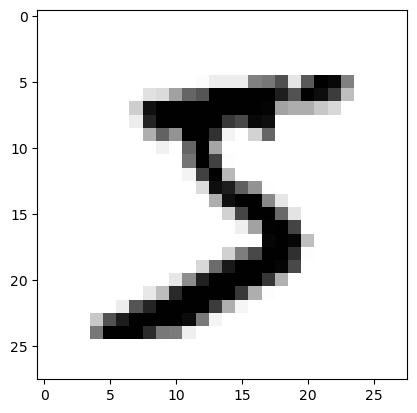

In [43]:
# Load data and inspect it
mnist = fetch_openml('mnist_784', version=1, cache=True,
                    as_frame=False)
X = mnist["data"][:10000]
y = mnist["target"][:10000].astype(np.uint8)
print(X.shape)
print(y.shape)

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
print("True label for the plotted image is", y[0])

# print(mnist.DESCR)

In [44]:
# Splitting data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=2000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2000, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
x_test = scaler.transform(X_test)

In [45]:
logreg_clf = LogisticRegression(max_iter=1000)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

named_estimators = [
    ("logreg_clf", logreg_clf),
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf)
]

voting_clf = VotingClassifier(named_estimators, voting='hard')

models = [logreg_clf, random_forest_clf, extra_trees_clf, voting_clf]
for model in models:
    model.fit(X_train, y_train)

print("Accuracy for each model")
model_names = ["Logistic Regression", "Random Forest", "Extra Trees", "Voting Classifier"]
for name, model in zip(model_names, models):
    score = model.score(X_val, y_val)
    print(f"{name:20s}: {score:.4f}")

Accuracy for each model
Logistic Regression : 0.8800
Random Forest       : 0.9380
Extra Trees         : 0.9400
Voting Classifier   : 0.9395


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       217
           1       0.99      0.98      0.98       217
           2       0.91      0.92      0.91       190
           3       0.94      0.89      0.92       218
           4       0.96      0.92      0.94       215
           5       0.95      0.89      0.92       160
           6       0.95      0.98      0.96       197
           7       0.94      0.93      0.94       210
           8       0.91      0.95      0.93       183
           9       0.88      0.95      0.91       193

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



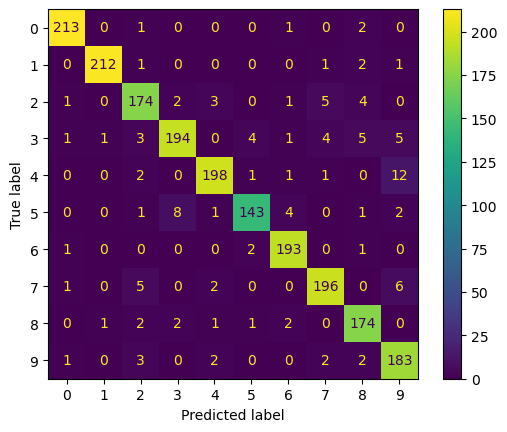

In [46]:
et_pred_val = extra_trees_clf.predict(X_val)

display_confusion_matrix(y_val, et_pred_val)
print(classification_report(y_val, et_pred_val))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       207
           1       0.00      0.00      0.00       216
           2       0.96      0.62      0.75       204
           3       0.87      0.48      0.62       192
           4       0.90      0.18      0.30       211
           5       1.00      0.01      0.01       176
           6       0.98      0.56      0.71       220
           7       0.00      0.00      0.00       216
           8       0.12      1.00      0.22       166
           9       0.67      0.06      0.11       192

    accuracy                           0.38      2000
   macro avg       0.64      0.39      0.36      2000
weighted avg       0.64      0.38      0.37      2000



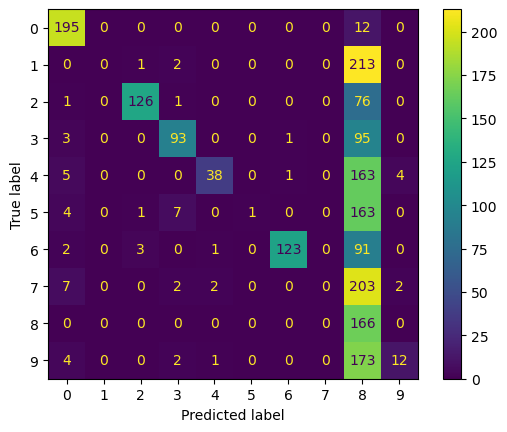

In [47]:
# Refit model on train + validation data
X_train_val = scaler.fit_transform(X_train_val)
extra_trees_clf.fit(X_train_val, y_train_val)

# Evaluate it on test data
et_pred_test = extra_trees_clf.predict(X_test)
display_confusion_matrix(y_test, et_pred_test)
print(classification_report(y_test, et_pred_test, zero_division=0))

In [48]:
scaler_2 = StandardScaler()
X = scaler_2.fit_transform(X)
extra_trees_clf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


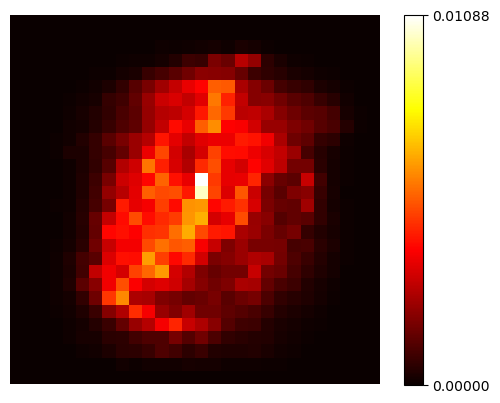

In [49]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")

plot_digit(extra_trees_clf.feature_importances_)

cbat = plt.colorbar(ticks=[extra_trees_clf.feature_importances_.min(), extra_trees_clf.feature_importances_.max()])

In [50]:
# 4.4.2 Kodexempel 2 - Välja önskad precision och recall

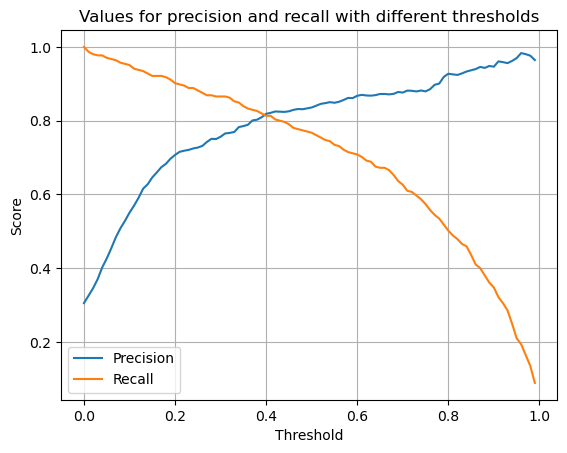

In [51]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, weights=[0.7,0.3], random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X, y)

y_scores = model.predict_proba(X)[:, 1]

thresholds = np.linspace(0.0, 0.99, 100)
precisions = []
recalls = []

for t in thresholds:
    y_pred = (y_scores >= t).astype(int)
    precisions.append(precision_score(y, y_pred, zero_division=0))
    recalls.append(recall_score(y, y_pred, zero_division=0))

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Values for precision and recall with different thresholds')
plt.legend()
plt.grid(True)

In [52]:
threshold = 0.6
y_pred_custom = (y_scores >= threshold).astype(int)

precision = precision_score(y, y_pred_custom)
recall = recall_score(y, y_pred_custom)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Precision: 0.867
Recall: 0.708


In [53]:
new_observation = np.array([[0.5, -1.2, 0.3, 0.5]])

new_score = model.predict_proba(new_observation)[:,1][0]
threshold = 0.6
new_pred = int(new_score >= threshold)

print(f"Probability for class 1: {new_score:.3f}")
print(f"Prediciton (with threshold={threshold}): {new_pred}")

Probability for class 1: 0.461
Prediciton (with threshold=0.6): 0
